In [27]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier

# Configure plots for better readability
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [28]:
# ------------ Load Processed Data -----------------------
PARTICIPANT_ID = 'BG'
file_path = "../data/labelled/EG.csv"
df = pd.read_csv(file_path)

# Separate Features (X) from the target Variable (Y)
# We also drop the timestamp as it's not a feature for the model

X = df.drop(columns=['stress_level', 'timestamp', 'session'])
y = df['stress_level']

# Fill nan values with mean for the sklearn classifier to work. 
X = X.fillna(X.mean())

print(f"Successfully loaded data for participant {PARTICIPANT_ID}.")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Successfully loaded data for participant BG.
Feature matrix shape: (38856, 43)
Target vector shape: (38856,)


In [31]:
# -------------------- Analysis 1 - ANOVA F-test (Filter Method) ---------------------------------
# Calculate F-scores and p-values for each feature
f_scores, p_values = f_classif(X, y)

# Create a DataFrame to hold the results
anova_results = pd.DataFrame({
     'feature': X.columns,
     'f_score': f_scores,
     'p_value': p_values
     }).sort_values(by='f_score', ascending=False
      ).reset_index(drop=True) 
print("Top 30 Features according to ANOVA F-test:")
display(anova_results.head(30))

Top 30 Features according to ANOVA F-test:


,feature,f_score,p_value
0,temp_max,372.318026,1.427135e-82
1,temp_mean,368.620992,8.949908e-82
2,temp_min,363.568754,1.100551e-80
3,hrv_mean_ibi,68.062056,1.633599e-16
4,hr_max,43.120723,5.211182e-11
5,hr_mean,41.472968,1.209050e-10
6,hr_min,39.567921,3.202124e-10
7,hr_acc_ratio,36.610903,1.455389e-09
8,bvp_pulse_width_mean,19.696979,9.099408e-06
9,eda_max,16.958941,3.827591e-05


/var/folders/db/q9dh3w413z9ffr2zhjp59mf80000gn/T/ipykernel_2520/2889972794.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f_score', y='feature',


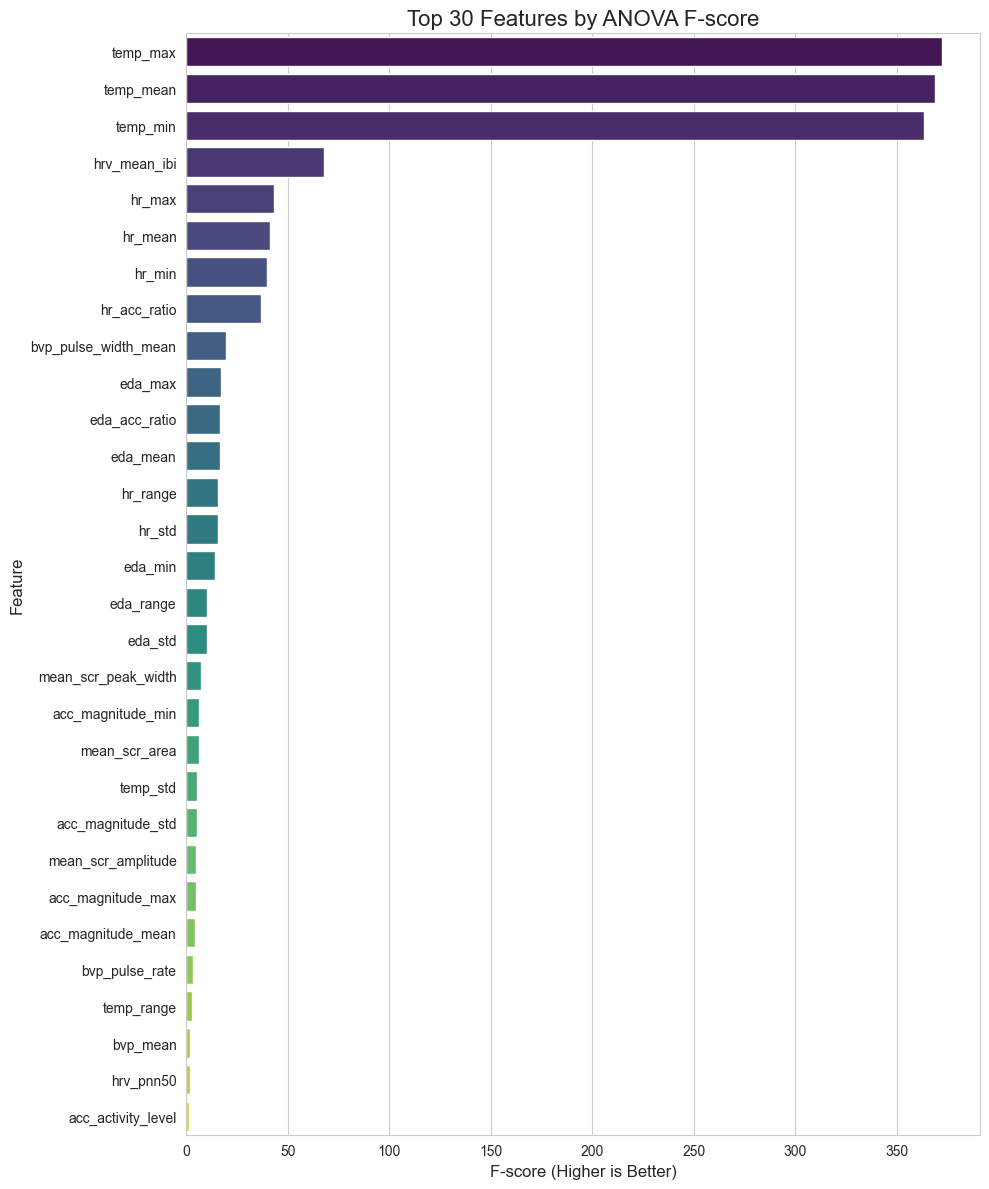

In [32]:
# ------------------- Visualize ANOVA F-test Results -----------------------------

# Plot the F-scores for the top 30 features
plt.figure(figsize=(10, 12))
sns.barplot(x='f_score', y='feature',
     data=anova_results.head(30), palette='viridis')
plt.title('Top 30 Features by ANOVA F-score', fontsize=16)
plt.xlabel('F-score (Higher is Better)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

In [33]:
# ----------------------- Analysis 2 - Random Forest Feature Importance (Embedded Method) -----------------------
 # Initialize and train the Random Forest model
# n_jobs=-1 uses all available CPU cores for faster training
model = RandomForestClassifier(n_estimators=100,
      random_state=42, n_jobs=-1)
model.fit(X, y)

# Create a DataFrame for feature importances
rf_results = pd.DataFrame({
     'feature': X.columns,
     'importance': model.feature_importances_
   }).sort_values(by='importance', ascending=False
      ).reset_index(drop=True)
 
print("Top 30 Features according to Random Forest Importance:")
display(rf_results.head(30))

Top 30 Features according to Random Forest Importance:


,feature,importance
0,temp_mean,0.065057
1,temp_max,0.058260
2,temp_min,0.057003
3,eda_acc_ratio,0.040154
4,eda_mean,0.038960
5,acc_magnitude_std,0.036018
6,eda_max,0.034791
7,acc_magnitude_mean,0.034348
8,acc_magnitude_min,0.028856
9,eda_min,0.028833


/var/folders/db/q9dh3w413z9ffr2zhjp59mf80000gn/T/ipykernel_2520/263773631.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature',data=rf_results.head(30), palette='plasma')


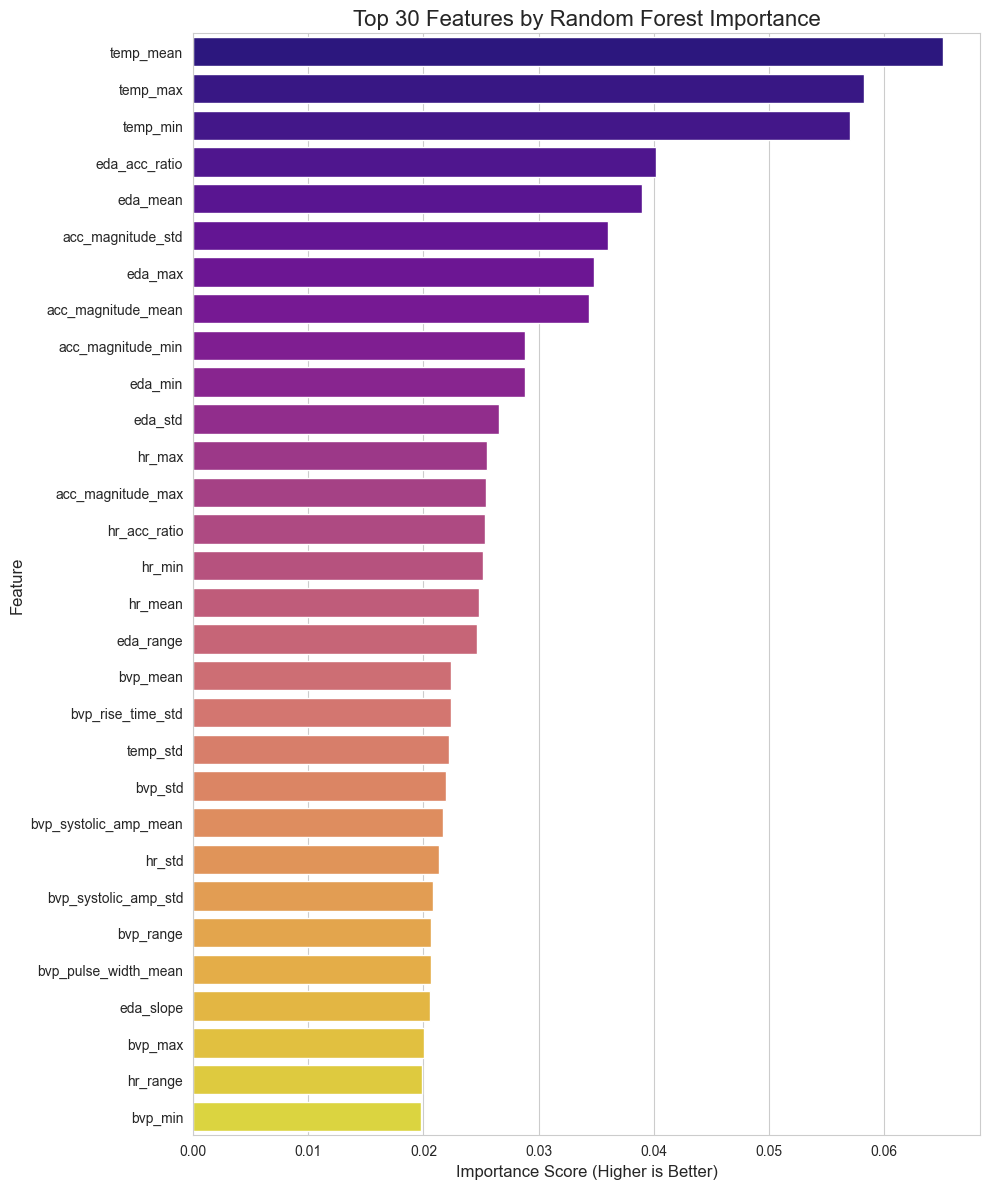

In [34]:
# ------------------------- Visualize Random Forest Results -------------------------------------

# Plot the feature importances for the top 30 features
plt.figure(figsize=(10, 12))
sns.barplot(x='importance', y='feature',data=rf_results.head(30), palette='plasma')
plt.title('Top 30 Features by Random Forest Importance',fontsize=16)
plt.xlabel('Importance Score (Higher is Better)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

In [35]:
# --------------------- Compare Results and Propose New Feature Set -------------------------------------
# The number of top features to consider from each method
TOP_N_FEATURES = 40


# Load the currently used feature list
with open('../config/selected_features.json', 'r') as f:
    current_features_data = json.load(f)
    current_features = current_features_data['features']

# Get the top N features from our new analyses
top_anova_features = set(anova_results.head(TOP_N_FEATURES)['feature'])
top_rf_features = set(rf_results.head(TOP_N_FEATURES)['feature'])
   
# Find the intersection: the features that both methods agree on
agreed_upon_features = sorted(list(top_anova_features.intersection(top_rf_features)))
 
print(f"--- Feature Selection Summary ---")
print(f"Number of currently used features: {len(current_features)}")
print(f"Number of top {TOP_N_FEATURES} ANOVA features: {len(top_anova_features)}")
print(f"Number of top {TOP_N_FEATURES} Random Forest features: {len(top_rf_features)}")
print(f"\nNumber of features in the intersection (agreed upon by both): {len(agreed_upon_features)}")
print("\n--- Proposed New Feature List ---")
# Print in a format that's easy to copy
print(json.dumps(agreed_upon_features, indent=2))


--- Feature Selection Summary ---
Number of currently used features: 37
Number of top 40 ANOVA features: 40
Number of top 40 Random Forest features: 40

Number of features in the intersection (agreed upon by both): 37

--- Proposed New Feature List ---
[
  "acc_magnitude_max",
  "acc_magnitude_mean",
  "acc_magnitude_min",
  "acc_magnitude_std",
  "bvp_max",
  "bvp_mean",
  "bvp_min",
  "bvp_pulse_rate",
  "bvp_pulse_width_mean",
  "bvp_range",
  "bvp_rise_time_mean",
  "bvp_std",
  "bvp_systolic_amp_mean",
  "bvp_systolic_amp_std",
  "eda_acc_ratio",
  "eda_max",
  "eda_mean",
  "eda_min",
  "eda_range",
  "eda_std",
  "hr_acc_ratio",
  "hr_max",
  "hr_mean",
  "hr_min",
  "hr_range",
  "hr_std",
  "hrv_mean_ibi",
  "hrv_sdnn",
  "mean_scr_amplitude",
  "mean_scr_area",
  "mean_scr_peak_width",
  "num_scr_peaks",
  "temp_max",
  "temp_mean",
  "temp_min",
  "temp_range",
  "temp_std"
]


In [36]:
# ----------------- Save the New Feature Set -------------------
 # Create the dictionary structure expected by the data loader
new_feature_config = {
       "features": agreed_upon_features
        }

 # Write the new configuration to the JSON file
output_path = '../config/selected_features.json'
with open(output_path, 'w') as f:
    json.dump(new_feature_config, f, indent=2)

print(f"Successfully saved {len(agreed_upon_features)} features to {output_path}")

Successfully saved 37 features to ../config/selected_features.json
